In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./kc_house_data.csv')

In [3]:
df.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20988,3305100230,20140618T000000,820000.0,4,2.5,3170,8523,2.0,0,0,...,9,3170,0,2008,0,98033,47.6854,-122.184,3230,8523
7237,3904921100,20150512T000000,674725.0,4,2.5,2700,10160,2.0,0,0,...,9,2700,0,1988,0,98029,47.5685,-122.012,2760,9219


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.corr().price.sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [8]:
pd.pandas.set_option('display.max_columns', None)

In [9]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
df.drop(['id','date','lat','long'],axis = 1,inplace = True)

In [11]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [12]:
df.waterfront.unique()

array([0, 1], dtype=int64)

In [13]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [14]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [15]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [16]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

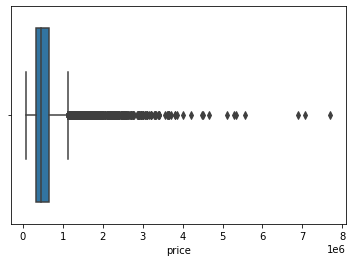

In [17]:
## visualizations

sns.boxplot(df['price'])

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = StandardScaler()
scaler.fit(df[['price']])
scaled_data = preprocessing.scale(df)

In [274]:
scaler.fit_transform(df31[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [273]:
sns.boxplot(df31.price)

AttributeError: 'numpy.ndarray' object has no attribute 'price'

In [268]:
df31

StandardScaler()

In [111]:
df11 = pd.DataFrame(scaled_data)

In [120]:
df11.rename(columns = {0:'price', 1:'bedrooms', 2:'bathrooms', 3:'sqft_living', 4:'sqft_lot', 5:'floors',
       6:'waterfront', 7:'view', 8:'condition', 9:'grade', 10:'sqft_above',
       11:'sqft_basement', 12:'yr_built', 13:'yr_renovated', 14:'zipcode', 15:'sqft_living15',
       16:'sqft_lot15'},inplace=True)

In [115]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [116]:
df11.columns

RangeIndex(start=0, stop=17, step=1)

In [129]:
df11

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,0.468382,-0.666135,-0.412381
21609,-0.381588,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.228419,-0.203946
21610,-0.375865,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,-1.410253,-0.394141
21611,-0.381588,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.841221,-0.420511


In [78]:
a = df.price.quantile(0.01)
b = df.price.quantile(0.99)
iqr = b-a

In [79]:
lower = df.price.quantile(0.25) - 1.5*iqr
upper = df.price.quantile(0.25)+ 1.5*iqr

In [80]:
#df1 = df.query("price>lower & price<upper")

df1 = df.loc[(df['price'] > lower) & (df['price'] < upper)]

In [81]:
print(df.shape)
df1.shape

(21613, 17)


(21568, 17)

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

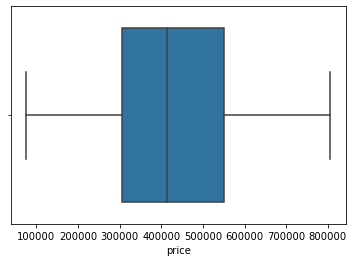

In [22]:
sns.boxplot(df1.price)

In [202]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,2.161300e+04
mean,-1.332853e-16,3.370842,2.114757,3.174253e-16,2.597695e-17,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,-2.022801e-15,1971.005136,84.402258,98077.939805,-1.506632e-16,1.235382e-16
std,1.000023e+00,0.930062,0.770163,1.000023e+00,1.000023e+00,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,1.000023e+00,29.373411,401.679240,53.505026,1.000023e+00,1.000023e+00
min,-1.266860e+00,0.000000,0.000000,-1.948891e+00,-3.521759e-01,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,-6.586810e-01,1900.000000,0.000000,98001.000000,-2.316325e+00,-4.438052e-01
25%,-5.941897e-01,3.000000,1.750000,-7.108948e-01,-2.430487e-01,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,-6.586810e-01,1951.000000,0.000000,98033.000000,-7.244971e-01,-2.808593e-01
50%,-2.453924e-01,3.000000,2.250000,-1.849914e-01,-1.808075e-01,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,-6.586810e-01,1975.000000,0.000000,98065.000000,-2.138280e-01,-1.885636e-01
75%,2.857709e-01,4.000000,2.500000,5.118578e-01,-1.066880e-01,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,6.066704e-01,1997.000000,0.000000,98118.000000,5.448802e-01,-9.835556e-02
max,1.950299e+01,33.000000,8.000000,1.247807e+01,3.950434e+01,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,1.023238e+01,2015.000000,2015.000000,98199.000000,6.162239e+00,3.144029e+01


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

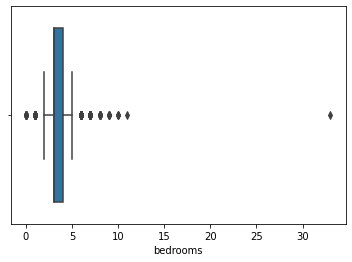

In [23]:
sns.boxplot(df.bedrooms)


In [24]:
a = df.bedrooms.quantile(0.25)
b = df.bedrooms.quantile(0.75)
iqr = b-a
#lower = df.bedrooms.quantile(0.25) - 1.5*iqr
lower = 0.9
#upper = df.bedrooms.quantile(0.25)+ 1.5*iqr
upper = 5.5

In [25]:
df2 = df1.loc[(df1['bedrooms'] > lower) & (df1['bedrooms'] < 5.5)]

In [26]:
upper

5.5

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

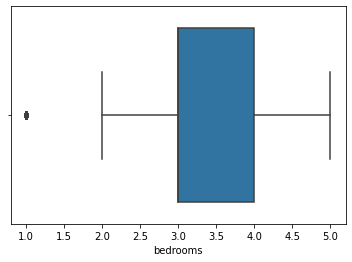

In [27]:
sns.boxplot(df2.bedrooms)

In [28]:
df2.shape

(18483, 17)

In [29]:
df2.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

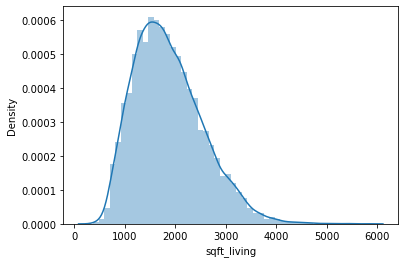

In [30]:
sns.distplot(df2.sqft_living)

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living'>

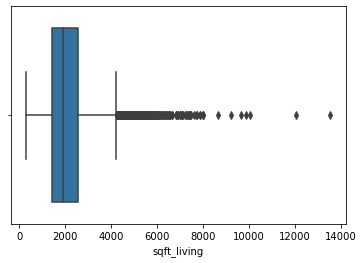

In [31]:
sns.boxplot(df.sqft_living)

In [32]:
import warnings 
warnings.filterwarnings('ignore')

In [33]:
a = df2.sqft_living.quantile(0.25)
b = df2.sqft_living.quantile(0.75)
iqr = b-a
lower = df2.sqft_living.quantile(0.25) - 1.5*iqr
upper = df2.sqft_living.quantile(0.25)+ 1.5*iqr
df3 = df2.loc[(df2['sqft_living'] > lower) & (df2['sqft_living'] < upper)]

<AxesSubplot:xlabel='sqft_living'>

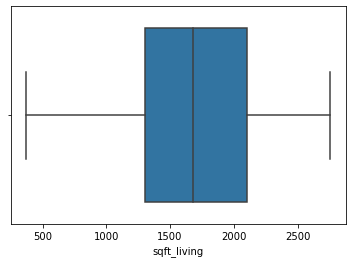

In [34]:
sns.boxplot(df3.sqft_living)

In [35]:
df3.shape

(16491, 17)

In [36]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


<AxesSubplot:xlabel='sqft_lot'>

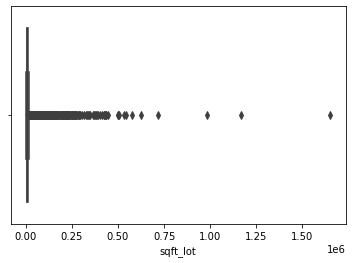

In [37]:
sns.boxplot(df3.sqft_lot)

In [38]:
a = df3.sqft_lot.quantile(0.25)
b = df3.sqft_lot.quantile(0.75)
iqr = b-a
lower = df3.sqft_lot.quantile(0.25) - 1.5*iqr
upper = df3.sqft_lot.quantile(0.25)+ 1.5*iqr
df4 = df3.loc[(df3['sqft_lot'] > lower) & (df3['sqft_lot'] < upper)]

<AxesSubplot:xlabel='sqft_lot'>

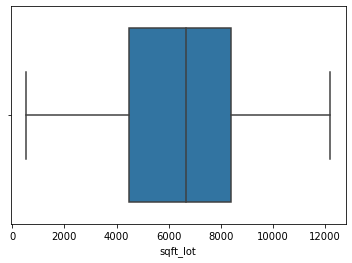

In [39]:
sns.boxplot(df4.sqft_lot)

In [40]:
df4.shape

(14060, 17)

<AxesSubplot:xlabel='sqft_above'>

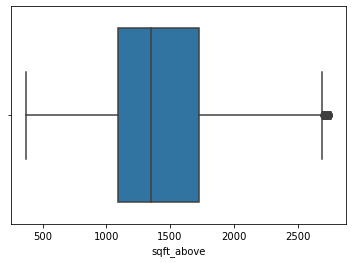

In [41]:
sns.boxplot(df4.sqft_above)

In [42]:
a = df4.sqft_above.quantile(0.25)
b = df4.sqft_above.quantile(0.75)
iqr = b-a
lower = df4.sqft_above.quantile(0.25) - 1.5*iqr
upper = df4.sqft_above.quantile(0.25)+ 1.5*iqr
df5 = df4.loc[(df4['sqft_above'] > lower) & (df4['sqft_above'] < upper)]

<AxesSubplot:xlabel='sqft_above'>

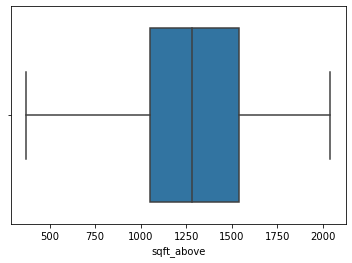

In [43]:
sns.boxplot(df5.sqft_above)

In [44]:
df5.shape

(12074, 17)

<AxesSubplot:xlabel='sqft_basement'>

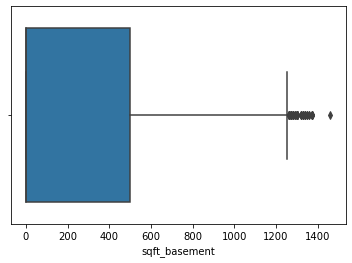

In [45]:
sns.boxplot(df5.sqft_basement)

<AxesSubplot:xlabel='sqft_basement'>

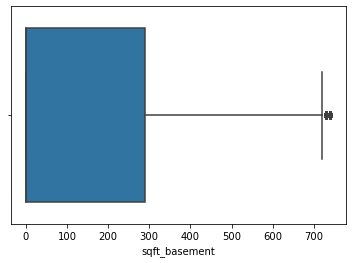

In [46]:
a = df5.sqft_basement.quantile(0.25)
b = df5.sqft_basement.quantile(0.75)
iqr = b-a
lower = df5.sqft_basement.quantile(0.25) - 1.5*iqr
upper = df5.sqft_basement.quantile(0.25)+ 1.5*iqr
df6 = df5.loc[(df5['sqft_basement'] > lower) & (df5['sqft_basement'] < upper)]
sns.boxplot(df6.sqft_basement)

In [47]:
df6.shape

(10388, 17)

In [48]:
df6.drop(['zipcode'],axis = 1,inplace = True)
df6.head(0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15


In [49]:
df6.drop(['yr_built','sqft_living15','sqft_living15','condition','yr_renovated','waterfront'],axis = 1,inplace =True)

In [50]:
df6.corr().price.sort_values(ascending = False)

price            1.000000
grade            0.447265
sqft_living      0.378250
sqft_above       0.258551
bathrooms        0.243585
sqft_basement    0.240333
floors           0.204255
view             0.178746
bedrooms         0.103264
sqft_lot15      -0.201465
sqft_lot        -0.245758
Name: price, dtype: float64

In [51]:
df6.head(0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,sqft_lot15


In [52]:
sns.boxplot(df6.sqft_living15)

AttributeError: 'DataFrame' object has no attribute 'sqft_living15'

In [ ]:
a = df6.sqft_living15.quantile(0.25)
b = df6.sqft_living15.quantile(0.75)
iqr = b-a
lower = df6.sqft_living15.quantile(0.25) - 1.5*iqr
upper = df6.sqft_living15.quantile(0.25)+ 1.5*iqr
df7 = df6.loc[(df6['sqft_living15'] > lower) & (df6['sqft_living15'] < upper)]
sns.boxplot(df7.sqft_living15)

In [ ]:
df7.shape

In [ ]:
sns.boxplot(df7.sqft_lot15)

In [53]:
a = df7.sqft_lot15.quantile(0.25)
b = df7.sqft_lot15.quantile(0.75)
iqr = b-a
lower = df7.sqft_lot15.quantile(0.25) - 1.5*iqr
upper = df7.sqft_lot15.quantile(0.25)+ 1.5*iqr
df8 = df7.loc[(df7['sqft_lot15'] > lower) & (df7['sqft_lot15'] < upper)]
sns.boxplot(df8.sqft_lot15)

NameError: name 'df7' is not defined

In [ ]:
df8.shape

In [131]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650


In [144]:


df12 = df11[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]

In [145]:
df13 = df11.drop(['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15'],axis = 1)

In [155]:
df13

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,-0.398737,-1.447464,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.544898,-0.210128,1.870152
1,-0.398737,0.175607,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.681079,4.746678,0.879568
2,-1.473959,-1.447464,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.293892,-0.210128,-0.933388
3,0.676485,1.149449,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.204446,-0.210128,1.085160
4,-0.398737,-0.149007,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,0.544548,-0.210128,-0.073636
...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,2.788439,-0.087173,-0.305759,-0.629187,0.291916,1.293542,-0.210128,0.468382
21609,0.676485,0.500221,0.936506,-0.087173,-0.305759,-0.629187,0.291916,1.463768,-0.210128,1.272063
21610,-1.473959,-1.772078,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,1.293542,-0.210128,1.234683
21611,-0.398737,0.500221,0.936506,-0.087173,-0.305759,-0.629187,0.291916,1.123316,-0.210128,-0.952078


In [166]:
df.price = preprocessing.scale(df.price)
df.sqft_living = preprocessing.scale(df.sqft_living)
df.sqft_lot = preprocessing.scale(df.sqft_lot)
df.sqft_lot = preprocessing.scale(df.sqft_lot)
df.	sqft_basement = preprocessing.scale(df.	sqft_basement)
df.sqft_living15 = preprocessing.scale(df.sqft_living15)
df.sqft_lot15 = preprocessing.scale(df.sqft_lot15)

In [167]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,-0.866717,3,1.00,-0.979835,-0.228321,1.0,0,0,3,7,1180,-0.658681,1955,0,98178,-0.943355,-0.260715
1,-0.005688,3,2.25,0.533634,-0.189885,2.0,0,0,3,7,2170,0.245141,1951,1991,98125,-0.432686,-0.187868
2,-0.980849,2,1.00,-1.426254,-0.123298,1.0,0,0,3,6,770,-0.658681,1933,0,98028,1.070140,-0.172375
3,0.174090,4,3.00,-0.130550,-0.244014,1.0,0,0,5,7,1050,1.397515,1965,0,98136,-0.914174,-0.284522
4,-0.081958,3,2.00,-0.435422,-0.169653,1.0,0,0,3,8,1680,-0.658681,1987,0,98074,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,3,2.50,-0.598746,-0.337424,3.0,0,0,3,8,1530,-0.658681,2009,0,98103,-0.666135,-0.412381
21609,-0.381588,4,2.50,0.250539,-0.224386,2.0,0,0,3,8,2310,-0.658681,2014,0,98146,-0.228419,-0.203946
21610,-0.375865,2,0.75,-1.154047,-0.332137,2.0,0,0,3,7,1020,-0.658681,2009,0,98144,-1.410253,-0.394141
21611,-0.381588,3,2.50,-0.522528,-0.307076,2.0,0,0,3,8,1600,-0.658681,2004,0,98027,-0.841221,-0.420511


In [270]:
df31 = pd.get_dummies(df,columns=['zipcode'])

In [271]:
df31 = pd.get_dummies(df31,columns= ['bedrooms'])

In [200]:
df31

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33
0,-0.866717,1.00,-0.979835,-0.228321,1.0,0,0,3,7,1180,-0.658681,1955,0,-0.943355,-0.260715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-0.005688,2.25,0.533634,-0.189885,2.0,0,0,3,7,2170,0.245141,1951,1991,-0.432686,-0.187868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-0.980849,1.00,-1.426254,-0.123298,1.0,0,0,3,6,770,-0.658681,1933,0,1.070140,-0.172375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.174090,3.00,-0.130550,-0.244014,1.0,0,0,5,7,1050,1.397515,1965,0,-0.914174,-0.284522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-0.081958,2.00,-0.435422,-0.169653,1.0,0,0,3,8,1680,-0.658681,1987,0,-0.272190,-0.192849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,2.50,-0.598746,-0.337424,3.0,0,0,3,8,1530,-0.658681,2009,0,-0.666135,-0.412381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21609,-0.381588,2.50,0.250539,-0.224386,2.0,0,0,3,8,2310,-0.658681,2014,0,-0.228419,-0.203946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21610,-0.375865,0.75,-1.154047,-0.332137,2.0,0,0,3,7,1020,-0.658681,2009,0,-1.410253,-0.394141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21611,-0.381588,2.50,-0.522528,-0.307076,2.0,0,0,3,8,1600,-0.658681,2004,0,-0.841221,-0.420511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [259]:
y = df31.price
X = df31.drop(['price'],axis = 1)


AttributeError: 'StandardScaler' object has no attribute 'price'

In [ ]:
df31

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
y_train_p = reg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score

In [260]:
r2_score(y_train,y_train_p)

0.8118552169233891

In [261]:
1-0.8118552169233891

0.18814478307661087

In [262]:
y_test_p = reg.predict(X_test)

In [263]:
r2_score(y_test[:2500],y_test_p[:2500])

-18707984.0634121

<AxesSubplot:xlabel='price'>

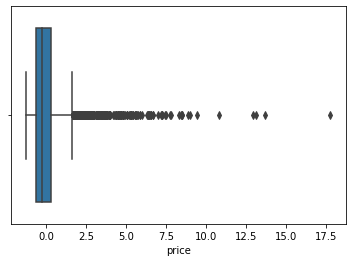

In [265]:
sns.boxplot(y_test) 